In [1]:
!pip install scikit-fuzzy

In [2]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#generation de l'univers des courbes


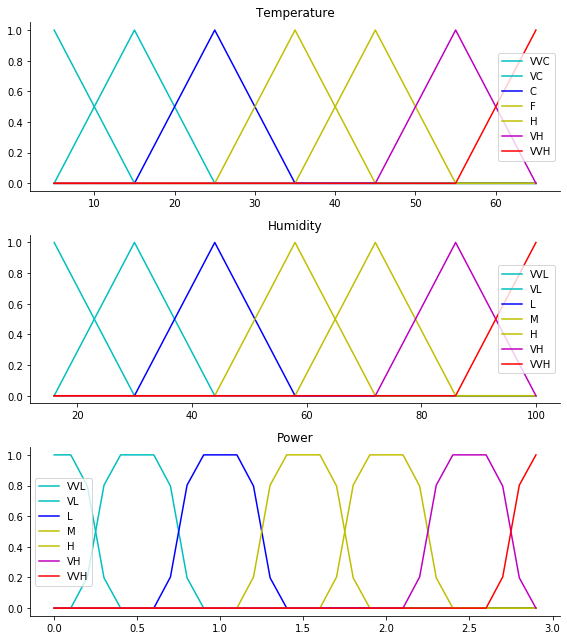

In [4]:
Temp_array = np.arange(5, 70, 5)
hum_array = np.arange(16, 114, 14)
power_array = np.arange(0, 3, 0.1)

VVC = fuzz.trimf(Temp_array, [5, 5, 15])
VC = fuzz.trimf(Temp_array, [5, 15, 25])
C = fuzz.trimf(Temp_array, [15, 25, 35])
F = fuzz.trimf(Temp_array, [25, 35, 45])
H = fuzz.trimf(Temp_array, [35, 45, 55])
VH = fuzz.trimf(Temp_array, [45, 55, 65])
VVH = fuzz.trimf(Temp_array, [55, 65, 65])

VVL_H = fuzz.trimf(hum_array, [16, 16, 30])
VL_H = fuzz.trimf(hum_array, [16, 30, 44])
L_H = fuzz.trimf(hum_array, [30, 44, 58])
M_H = fuzz.trimf(hum_array, [44, 58, 72])
H_H = fuzz.trimf(hum_array, [58, 72, 86])
VH_H = fuzz.trimf(hum_array, [72, 86, 100])
VVH_H = fuzz.trimf(hum_array, [86, 100, 100])

VVL_P = fuzz.trapmf(power_array, [0, 0, 0.166, 0.333])
VL_P = fuzz.trapmf(power_array, [0.166, 0.333, 0.666, 0.833])
L_P = fuzz.trapmf(power_array, [0.666, 0.833, 1.166, 1.333])
M_P = fuzz.trapmf(power_array, [1.166, 1.333, 1.666, 1.833])
H_P = fuzz.trapmf(power_array, [1.666, 1.833, 2.166, 2.333])
VH_P = fuzz.trapmf(power_array, [2.166, 2.333, 2.666, 2.833])
VVH_P = fuzz.trapmf(power_array, [2.666, 2.833, 3, 3]) # to check

# dessin du tableau
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))
ax0.plot(Temp_array, VVC, 'c', linewidth=1.5, label='VVC')
ax0.plot(Temp_array, VC, 'c', linewidth=1.5, label='VC')
ax0.plot(Temp_array, C, 'b', linewidth=1.5, label='C')
ax0.plot(Temp_array, F, 'y', linewidth=1.5, label='F')
ax0.plot(Temp_array, H, 'y', linewidth=1.5, label='H')
ax0.plot(Temp_array, VH, 'm', linewidth=1.5, label='VH')
ax0.plot(Temp_array, VVH, 'r', linewidth=1.5, label='VVH')
ax0.set_title('Temperature')
ax0.legend()

ax1.plot(hum_array, VVL_H, 'c', linewidth=1.5, label='VVL')
ax1.plot(hum_array, VL_H, 'c', linewidth=1.5, label='VL')
ax1.plot(hum_array, L_H, 'b', linewidth=1.5, label='L')
ax1.plot(hum_array, M_H, 'y', linewidth=1.5, label='M')
ax1.plot(hum_array, H_H, 'y', linewidth=1.5, label='H')
ax1.plot(hum_array, VH_H, 'm', linewidth=1.5, label='VH')
ax1.plot(hum_array, VVH_H, 'r', linewidth=1.5, label='VVH')
ax1.set_title('Humidity')
ax1.legend()

ax2.plot(power_array, VVL_P, 'c', linewidth=1.5, label='VVL')
ax2.plot(power_array, VL_P, 'c', linewidth=1.5, label='VL')
ax2.plot(power_array, L_P, 'b', linewidth=1.5, label='L')
ax2.plot(power_array, M_P, 'y', linewidth=1.5, label='M')
ax2.plot(power_array, H_P, 'y', linewidth=1.5, label='H')
ax2.plot(power_array, VH_P, 'm', linewidth=1.5, label='VH')
ax2.plot(power_array, VVH_P, 'r', linewidth=1.5, label='VVH')
ax2.set_title('Power')
ax2.legend()


# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

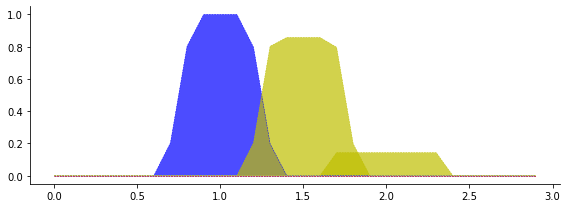

In [5]:
#interpretation de 35°C et 50% humidité
val_temp = 25
val_hum = 60

VVC_fuzz = fuzz.interp_membership(Temp_array, VVC, val_temp)
VC_fuzz = fuzz.interp_membership(Temp_array, VC, val_temp)
C_fuzz = fuzz.interp_membership(Temp_array, C, val_temp)
F_fuzz = fuzz.interp_membership(Temp_array, F, val_temp)
H_fuzz = fuzz.interp_membership(Temp_array, H, val_temp)
VH_fuzz = fuzz.interp_membership(Temp_array, VH, val_temp)
VVH_fuzz = fuzz.interp_membership(Temp_array, VVH, val_temp)

VVL_H_fuzz= fuzz.interp_membership(hum_array, VVL_H, val_hum)
VL_H_fuzz= fuzz.interp_membership(hum_array, VL_H, val_hum)
L_H_fuzz= fuzz.interp_membership(hum_array, L_H, val_hum)
M_H_fuzz= fuzz.interp_membership(hum_array, M_H, val_hum)
H_H_fuzz= fuzz.interp_membership(hum_array, H_H, val_hum)
VH_H_fuzz= fuzz.interp_membership(hum_array, VH_H, val_hum)
VVH_H_fuzz= fuzz.interp_membership(hum_array, VVH_H, val_hum)


# defuzzificating the values
Max_VVL_fuzz = np.fmax(VVC_fuzz, VVL_H_fuzz)
VVL_P_defuzz = np.fmin(Max_VVL_fuzz, VVL_P)

Max_VL_fuzz = np.fmax(VC_fuzz, VL_H_fuzz)
VL_P_defuzz = np.fmin(Max_VL_fuzz, VL_P)

Max_L_fuzz = np.fmax(C_fuzz, L_H_fuzz)
L_P_defuzz = np.fmin(Max_L_fuzz, L_P)

Max_M_fuzz = np.fmax(F_fuzz, M_H_fuzz)
M_P_defuzz = np.fmin(Max_M_fuzz, M_P)

Max_H_fuzz = np.fmax(H_fuzz, H_H_fuzz)
H_P_defuzz = np.fmin(Max_H_fuzz, H_P)

Max_VH_fuzz = np.fmax(VH_fuzz, VH_H_fuzz)
VH_P_defuzz = np.fmin(Max_VH_fuzz, VH_P)

Max_VVH_fuzz = np.fmax(VVH_fuzz, VVH_H_fuzz)
VVH_P_defuzz = np.fmin(Max_VVH_fuzz, VVH_P)

power0 = np.zeros_like(power_array)

# Visualization
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(power_array, power0, VVL_P_defuzz, facecolor='c', alpha=0.7)
ax0.plot(power_array, VVL_P_defuzz, 'c', linewidth=0.5, linestyle='--', )

ax0.fill_between(power_array, power0, VL_P_defuzz, facecolor='c', alpha=0.7)
ax0.plot(power_array, VL_P_defuzz, 'c', linewidth=0.5, linestyle='--', )

ax0.fill_between(power_array, power0, L_P_defuzz, facecolor='b', alpha=0.7)
ax0.plot(power_array, L_P_defuzz, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(power_array, power0, M_P_defuzz, facecolor='y', alpha=0.7)
ax0.plot(power_array, M_P_defuzz, 'y', linewidth=0.5, linestyle='--', )

ax0.fill_between(power_array, power0, H_P_defuzz, facecolor='y', alpha=0.7)
ax0.plot(power_array, H_P_defuzz, 'y', linewidth=0.5, linestyle='--', )

ax0.fill_between(power_array, power0, VH_P_defuzz, facecolor='m', alpha=0.7)
ax0.plot(power_array, VH_P_defuzz, 'm', linewidth=0.5, linestyle='--', )

ax0.fill_between(power_array, power0, VVH_P_defuzz, facecolor='r', alpha=0.7)
ax0.plot(power_array, VVH_P_defuzz, 'r', linewidth=0.5, linestyle='--', )

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()


1.0


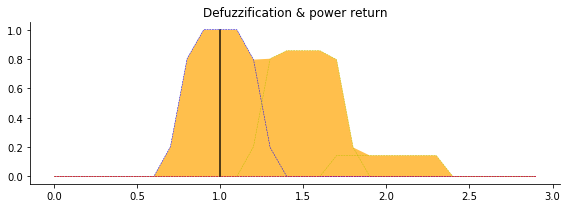

In [6]:
#merging data
aggregated = np.fmax(VVL_P_defuzz,
np.fmax(VL_P_defuzz,
np.fmax(L_P_defuzz,
np.fmax(M_P_defuzz,
np.fmax(H_P_defuzz,
np.fmax(VH_P_defuzz, VVH_P_defuzz))))))

power = fuzz.defuzz(power_array, aggregated, 'mom')

# visualization
power_visu = fuzz.interp_membership(power_array, aggregated, power)



# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(power_array, VVL_P_defuzz, 'c', linewidth=0.5, linestyle='--', )
ax0.plot(power_array, VL_P_defuzz, 'c', linewidth=0.5, linestyle='--', )
ax0.plot(power_array, L_P_defuzz, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(power_array, M_P_defuzz, 'y', linewidth=0.5, linestyle='--', )
ax0.plot(power_array, H_P_defuzz, 'y', linewidth=0.5, linestyle='--', )
ax0.plot(power_array, VH_P_defuzz, 'm', linewidth=0.5, linestyle='--', )
ax0.plot(power_array, VVH_P_defuzz, 'r', linewidth=0.5, linestyle='--', )

ax0.fill_between(power_array, power0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([power, power], [0, power_visu], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Defuzzification & power return')
# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()
print(power)